## **Passageiros Aéreos de 1970 a 2021**

Fonte: 'Multiple sources compiled by World Bank (2024) – processed by Our World in Data. “Air passengers” [dataset]. International Civil Aviation Organization (via World Bank), “World Development Indicators” [original data]. Retrieved January 23, 2025 from https://ourworldindata.org/grapher/air-passengers-carried

In [1]:
# preparação do notebook
import sys
import os

sys.path.append(os.path.abspath('..'))

import warnings
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
from highlight_text import fig_text, ax_text
from src.utils import y_ticks_formatter

pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings('ignore')
plt.rcParams["figure.dpi"] = 150

%load_ext autoreload
%autoreload 2

### **Leitura e Tratamento dos Dados**

In [2]:
# leitura dos dados
df = pd.read_csv(
    "https://ourworldindata.org/grapher/air-passengers-carried.csv?v=1&csvType=full&useColumnShortNames=true", 
    storage_options={'User-Agent': 'Our World In Data data fetch/1.0'}
)

metadata = requests.get(
    "https://ourworldindata.org/grapher/air-passengers-carried.metadata.json?v=1&csvType=full&useColumnShortNames=true"
).json()

In [3]:
metadata['columns']['is_air_psgr']

{'titleShort': 'Air transport, passengers carried',
 'titleLong': 'Air transport, passengers carried',
 'descriptionKey': [],
 'unit': '',
 'timespan': '1970-2021',
 'type': 'Numeric',
 'owidVariableId': 905338,
 'shortName': 'is_air_psgr',
 'lastUpdated': '2024-05-20',
 'nextUpdate': '2025-05-20',
 'citationShort': 'Multiple sources compiled by World Bank (2024) – processed by Our World in Data',
 'citationLong': 'Multiple sources compiled by World Bank (2024) – processed by Our World in Data. “Air transport, passengers carried” [dataset]. International Civil Aviation Organization (via World Bank), “World Development Indicators” [original data].',
 'fullMetadata': 'https://api.ourworldindata.org/v1/indicators/905338.metadata.json'}

In [4]:
# visualizando dados
df.head()

,Entity,Code,Year,is_air_psgr
0,Afghanistan,AFG,1970,84700.00
1,Afghanistan,AFG,1971,97400.00
2,Afghanistan,AFG,1972,104900.00
3,Afghanistan,AFG,1973,96600.00
4,Afghanistan,AFG,1974,96100.00


In [5]:
# verificando se o dataset contém dados dos anos para os países
# iremos utilizar para a visualização apenas os países com todos os anos
count = df.value_counts('Entity')
count

Entity
Lebanon           52
Egypt             52
Indonesia         52
India             52
Iceland           52
                  ..
Gambia            10
Eritrea            6
American Samoa     5
Aruba              2
Guam               2
Name: count, Length: 199, dtype: int64

In [6]:
# filtrando apenas os países todos os anos registrados
df = df.loc[df['Entity'].isin(count[count == 52].index)]
df

,Entity,Code,Year,is_air_psgr
70,Algeria,DZA,1970,563200.00
71,Algeria,DZA,1971,714800.00
72,Algeria,DZA,1972,843900.00
73,Algeria,DZA,1973,1053600.00
74,Algeria,DZA,1974,1252100.00
...,...,...,...,...
8066,Venezuela,VEN,2017,4209158.00
8067,Venezuela,VEN,2018,2217407.00
8068,Venezuela,VEN,2019,1516839.00
8069,Venezuela,VEN,2020,283524.00


### **Visualização**

In [7]:
# primeira visualização: volume total de passageiros por ano
grouped_df = (
    df
    .groupby("Year", as_index=False)
    .agg({'is_air_psgr' : 'sum'})
)

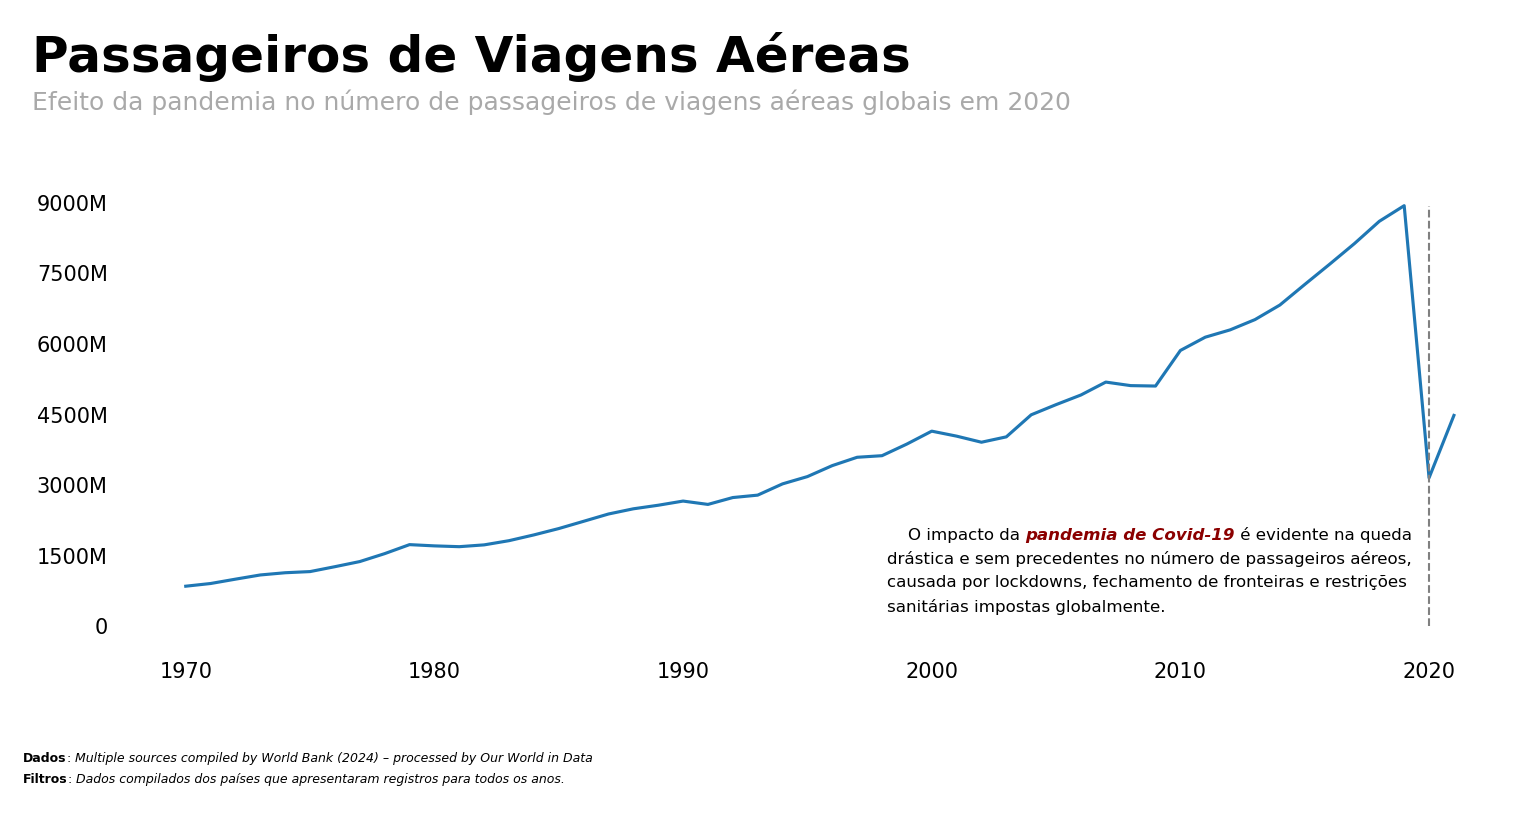

In [8]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(grouped_df['Year'], grouped_df['is_air_psgr'])

# removendo bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# configurando eixos
ax.yaxis.set_major_formatter(FuncFormatter(y_ticks_formatter))
ax.yaxis.set_major_locator(MaxNLocator(nbins=7))
ax.tick_params(left=False, bottom=False)

# titulos e subtitulos
min_dt = df.Year.min()
max_dt = df.Year.max()

text = f"""
Passageiros de Viagens Aéreas
<Efeito da pandemia no número de passageiros de viagens aéreas globais em 2020>
"""
fig_text(
    x=0.075, 
    y=1.15,
    s=text, 
    color='black',
    fontweight='bold',
    fontsize=24,
    highlight_textprops=[
        {"fontsize": 12,
         "color": 'darkgrey',
         "fontweight": 'normal'}
    ],
    ha='left'
)

# comentario pandemia
plt.vlines(
    x=2020, ymin=0, ymax=grouped_df['is_air_psgr'].max(),
    color='gray', linewidth=1, linestyles='dashed'
)

text = f"""
<Dados>: <{metadata['columns']['is_air_psgr']['citationShort']}>
<Filtros>: <Dados compilados dos países que apresentaram registros para todos os anos.>
"""
fig_text(
    x=0.07, 
    y=-0.05,
    s=text, 
    color='black',
    ha='left',
    fontsize=6,
    highlight_textprops=[
        {"fontweight": 'bold'},
        {"fontstyle": 'italic'},
        {"fontweight": 'bold'},
        {"fontstyle": 'italic'},
    ],
)


# creditos
text = f"""
    O impacto da <pandemia de Covid-19> é evidente na queda 
drástica e sem precedentes no número de passageiros aéreos, 
causada por lockdowns, fechamento de fronteiras e restrições 
sanitárias impostas globalmente.
"""
fig_text(
    x=0.55, 
    y=0.325,
    s=text, 
    color='black',
    ha='left',
    fontsize=8,
    highlight_textprops=[
        {"fontstyle": 'italic', "fontweight": 'bold', 'color': 'darkred'},
    ],
)

plt.show()

### **Fontes e Inspirações**
Dados: https://ourworldindata.org/grapher/air-passengers-carried?tab=chart&country=~BRA#sources-and-processing \
Estilização: https://python-graph-gallery.com/web-stacked-charts/

In [9]:
#TODO:
# adicionar análise de impacto causal e modelar gráfico com resultados
# adicionar análise dos principais países em subplots